In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Model Evaluation

In [4]:
df=pd.read_csv('data/GasTurbine_Handled.csv')

In [5]:
# Separate features and target
X = df.drop(columns=['GT Turbine decay state coefficient'])
y = df['GT Turbine decay state coefficient']

In [6]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Define a function to train and evaluate models
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, mae, r2

In [9]:
# List of models to train
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Support Vector Regression': SVR(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'AdaBoost Regression': AdaBoostRegressor(),
    'XGBoost Regression': xgb.XGBRegressor(),
    'K-Nearest Neighbors Regression': KNeighborsRegressor()
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    mse, rmse, mae, r2 = train_and_evaluate(model, X_train, X_test, y_train, y_test)
    results[model_name] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R^2': r2}

# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

                                     MSE      RMSE       MAE       R^2
Linear Regression               0.000049  0.006977  0.005862  0.166520
Ridge Regression                0.000049  0.006981  0.005874  0.165510
Lasso Regression                0.000058  0.007642  0.006622 -0.000064
ElasticNet Regression           0.000058  0.007642  0.006622 -0.000064
Support Vector Regression       0.000058  0.007643  0.006624 -0.000310
Decision Tree Regression        0.000003  0.001672  0.000605  0.952156
Random Forest Regression        0.000001  0.001133  0.000427  0.977999
Gradient Boosting Regression    0.000010  0.003189  0.002369  0.825842
AdaBoost Regression             0.000050  0.007041  0.005880  0.150939
XGBoost Regression              0.000002  0.001282  0.000726  0.971843
K-Nearest Neighbors Regression  0.000003  0.001809  0.000755  0.943952


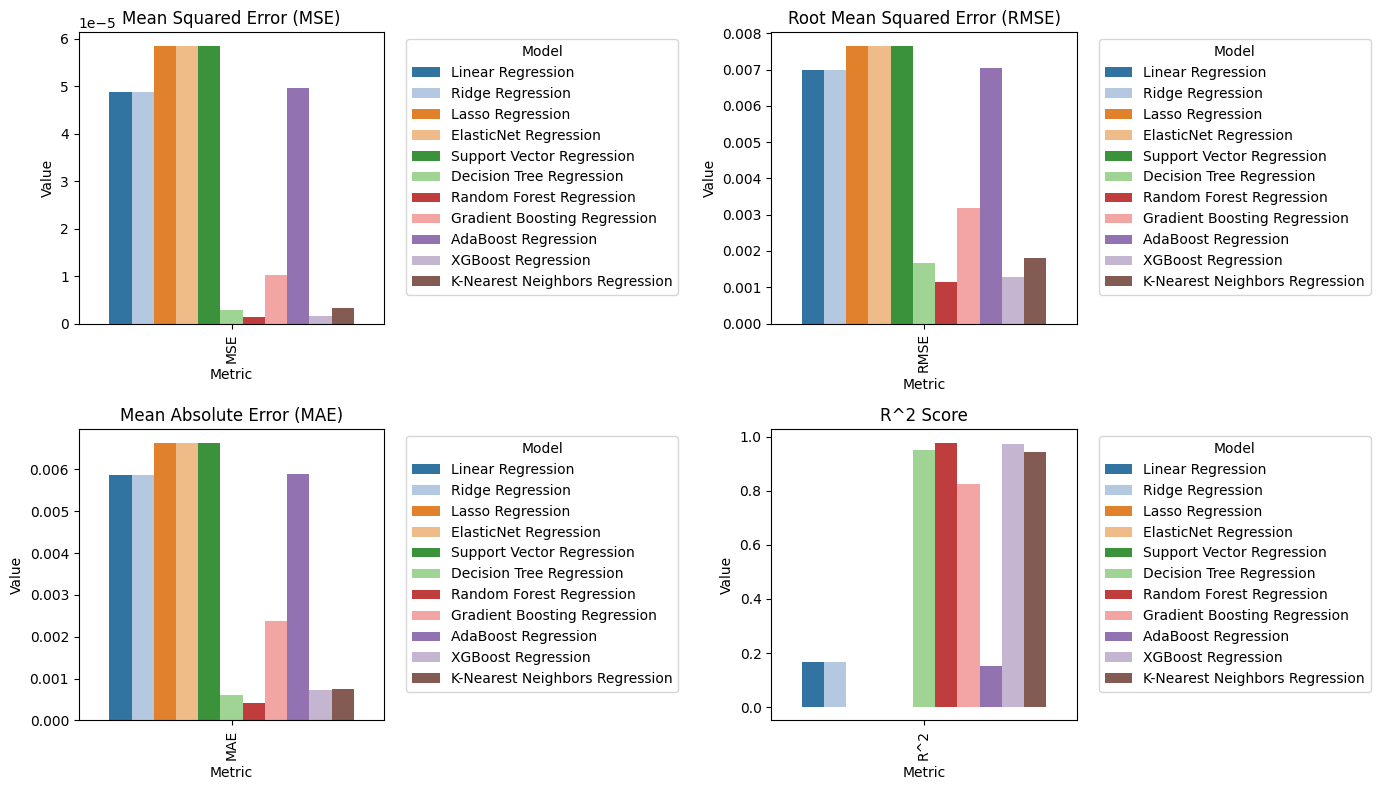

In [10]:
# Create a DataFrame to store the actual and predicted values
metrics = results_df.reset_index()
metrics.columns = ['Model', 'MSE', 'RMSE', 'MAE', 'R^2']

# Melt the DataFrame for easy plotting
metrics_melted = metrics.melt(id_vars='Model', var_name='Metric', value_name='Value')

plt.figure(figsize=(14, 8))

# Plot MSE
plt.subplot(2, 2, 1)
sns.barplot(x='Metric', y='Value', hue='Model', data=metrics_melted[metrics_melted['Metric'] == 'MSE'], palette='tab20')
plt.xticks(rotation=90)
plt.title('Mean Squared Error (MSE)')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot RMSE
plt.subplot(2, 2, 2)
sns.barplot(x='Metric', y='Value', hue='Model', data=metrics_melted[metrics_melted['Metric'] == 'RMSE'], palette='tab20')
plt.xticks(rotation=90)
plt.title('Root Mean Squared Error (RMSE)')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot MAE
plt.subplot(2, 2, 3)
sns.barplot(x='Metric', y='Value', hue='Model', data=metrics_melted[metrics_melted['Metric'] == 'MAE'], palette='tab20')
plt.xticks(rotation=90)
plt.title('Mean Absolute Error (MAE)')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot R^2
plt.subplot(2, 2, 4)
sns.barplot(x='Metric', y='Value', hue='Model', data=metrics_melted[metrics_melted['Metric'] == 'R^2'], palette='tab20')
plt.xticks(rotation=90)
plt.title('R^2 Score')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [11]:
rf=RandomForestRegressor()

In [14]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [15]:
y_pred_rf = rf.predict(X_test)
ytr_pred_rf = rf.predict(X_train)

In [16]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [17]:
trmse_rf = mean_squared_error(y_train, ytr_pred_rf)
trrmse_rf = np.sqrt(trmse_rf)
trmae_rf = mean_absolute_error(y_train, ytr_pred_rf)
trr2_rf = r2_score(y_train, ytr_pred_rf)

In [18]:
print(f'MAE_y_test= {mae_rf}\nMSE_y_test= {mse_rf}\nRMSE_y_test= {rmse_rf}\nR^2_y_test= {r2_rf}')

MAE_y_test= 0.0004269758601036269
MSE_y_test= 1.278159585401479e-06
RMSE_y_test= 0.0011305572012956615
R^2_y_test= 0.9781124514572002


In [19]:
print(f'MAE_y_train= {trmae_rf}\nMSE_y_train= {trmse_rf}\nRMSE_y_train= {trrmse_rf}\nR^2_y_train= {trr2_rf}')

MAE_y_train= 0.00018154947915911235
MSE_y_train= 2.853025304279267e-07
RMSE_y_train= 0.0005341371831542218
R^2_y_train= 0.9950718203721435


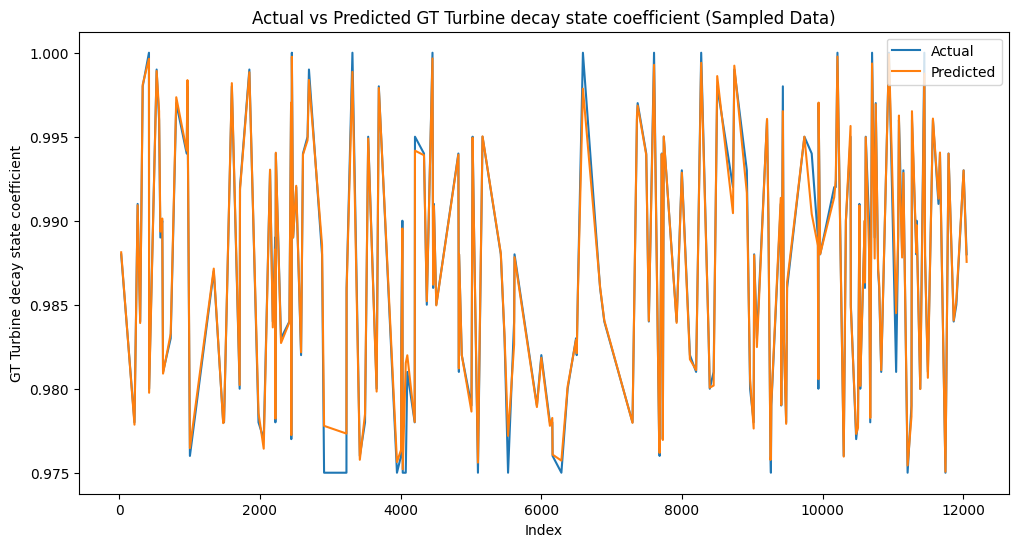

In [20]:
# Create a DataFrame to store the actual and predicted values
df_plot = pd.DataFrame({'Index': y_test.index, 'Actual': y_test, 'Predicted': y_pred_rf})

# Sample a subset of the data
sample_size = 190  # Adjust this size as needed
df_sample = df_plot.sample(n=sample_size, random_state=42)  # Set a random seed for reproducibility

# Plot the actual and predicted values for the sample
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_sample, x='Index', y='Actual', label='Actual')
sns.lineplot(data=df_sample, x='Index', y='Predicted', label='Predicted')
plt.ylabel("GT Turbine decay state coefficient")
plt.xlabel("Index")
plt.title("Actual vs Predicted GT Turbine decay state coefficient (Sampled Data)")
plt.legend(loc='upper right')
plt.show()